# PROJETO 3 - Ciência dos Dados 2019.2


### Reincidência de Presos

Alunos: **Beatriz Cabral | Bruno Meneghesso | Jonas Lopes | William Silva** - *INSPER - INSTITUTO DE ENSINO E PESQUISA*

## PERGUNTA

O objetivo desse projeto é analisar qual a probabilidade de um prisioneiro reincidir, analisando as diferentes variáveis que afetam, tais como etnia, idade, tipo de crime entre outros. 

## CONTEXTUALIZAÇÃO

O *dataset* a ser analisado é um grande conjunto de dados que tem informações sobre detentos, que estão descritas um pouco mais abaixo com maior detalhamento acerca de cada uma das variáveis. O propósito de analisar tais dados é de obter uma resposta à pergunta anterior

s dados para esta análise foram obtidos a partir deste [link](https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison). O Dataset utilizado conta com 26021 registros. 


### Explicação cada uma das variáveis

* **Fiscal Year Released**: Ano fiscal (termina em 30 de junho nos EUA) para o qual o infrator foi libertado da prisão

* **Recidivism Reporting Year**: Ano fiscal (ano que termina em 30 de junho nos EUA) que marca o final do período de rastreamento de três anos. Por exemplo, os infratores que saíram da prisão no ano fiscal de 2012 são encontrados no relatório de reincidência do ano fiscal de 2015.

* **Race - Ethnicity**: representa a etnia dos detentos e é dividido em 4 grandes grupos: Americanos indianos, Asiáticos, Brancos e Negros.   

* **Age At Release**: Idade do prisioneiro no ano da sua soltura

* **Convicting Offense Classification**: Classificação da gravidade do crime. Penalidades máximas: A Felony = vida; B Felony = 25 ou 50 anos; C Felony = 10 anos; D Felony = 5 anos; Contravenção Agravada = 2 anos; Contravenção Grave = 1 ano; Contravenção Simples = 30 dias

* **Convicting Offense Type**: Categoria geral da ofensa mais grave pela qual o infrator foi colocado na prisão

* **Convicting Offense Subtype**: Subtipo de crime. Classificação adicional do crime mais grave pelo qual o agressor foi colocado na prisão.

* **Main Supervising District**: Distrito Judiciário responsável pela supervisão do infrator por mais tempo durante o período de rastreamento

* **Release Type**: Motivo para a libertação do infrator da prisão.

* **Release type: Paroled to Detainder united**:

* **Part of Target Population**: Parte da população-alvo. O Departamento de Correções adotou estratégias específicas para reduzir as taxas de reincidência de prisioneiros em liberdade condicional e que fazem parte da população-alvo.

* **Recidivism - Return to Prison numeric**: 0 = Não há reincidência; 1 = Entrada na prisão por qualquer motivo dentro do período de rastreamento de três anos


In [ ]:
db.head()


## HIPÓTESE E MECANISMO

### Importando biblioteca e leitura dos arquivos

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [2]:
db = pd.read_csv('3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv')

db['Recidivism - Return to Prison numeric'].value_counts().to_frame()

,Recidivism - Return to Prison numeric
0,17339
1,8681


A partir da tabela acima, pode-se observar que nesta prisão 17339 presos não voltam a cometer crimes e 8681 reincidem.

### Explicação das colunas

**Fiscal Year Released**: 

**Recidivism Reporting Year**:

**Race - Ethnicity**:

**Age At Release**:

**Convicting Offense Classification**:

**Convicting Offense Type**:

**Convicting Offense Subtype**:

**Main Supervising District**:

**Release Type**:

**Release type: Paroled to Detainder united**:

**Part of Target Population**:

**Recidivism - Return to Prison numeric**:



## Análise Exploratória

Abaixo, iremos realizar a análise exploratória, com o intuito de se ter uma visão melhor dos dados que se possui, para poder decidir o caminho ao qual seguir.

In [6]:
etnia_motivo = pd.crosstab(db["Race - Ethnicity"], db["Convicting Offense Subtype"], normalize=True)*100
k = etnia_motivo.sum().sort_values(ascending=False)

In [7]:
#zero = pd.crosstab(db[db["Recidivism - Return to Prison numeric"]==0])
db.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1


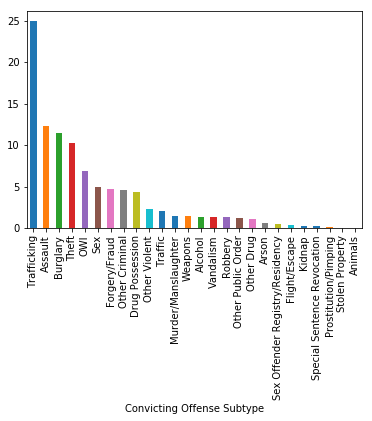

In [8]:
k.plot(kind='bar', legend=False)

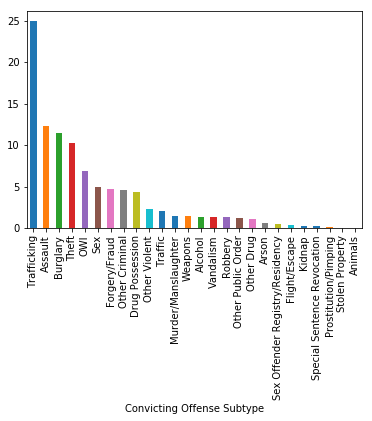

In [9]:
k.plot(kind='bar', by="Recidivism - Return to Prison numeric")

In [10]:
def exploratoria (data,compara, num=[], cat=[]):
    d0=data[data[compara]==0]
    d1=data[data[compara]==1]
    cros={}
    cros_norm={}
    box={}
    for c in cat:
        print(pd.crosstab(data[c],data[compara],normalize='index'))
        
        print(pd.crosstab(data[c],data[compara]))
        cros[c] = pd.crosstab(data[c],data[compara])
        cros_norm[c] = pd.crosstab(data[c],data[compara],normalize='index')
        cros_norm[c].plot(kind='bar', color=('black', 'b'))
        plt.ylabel('Frequência Absoluta')
        print ('Não Reincide')
        d0[c].hist(density=True,xrot=45)
        plt.show()
        print ('Reincide')
        d1[c].hist(density=True,xrot=45)
        plt.show()
    for n in num:
        plt.figure()
        data.boxplot(column = [n], by = compara)
        box[c]=data.boxplot(column = [n], by = compara)
    return{'crosstab':cros,'boxplot':box,'normed': cros_norm}
        
    

Recidivism - Return to Prison numeric         0         1
Fiscal Year Released                                     
2010                                   0.696717  0.303283
2011                                   0.703344  0.296656
2012                                   0.681435  0.318565
2013                                   0.657563  0.342437
2014                                   0.646097  0.353903
2015                                   0.621856  0.378144
Recidivism - Return to Prison numeric     0     1
Fiscal Year Released                             
2010                                   2589  1127
2011                                   2755  1162
2012                                   3230  1510
2013                                   3082  1605
2014                                   2963  1623
2015                                   2720  1654
Não Reincide


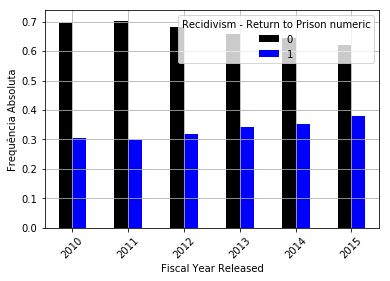

Reincide


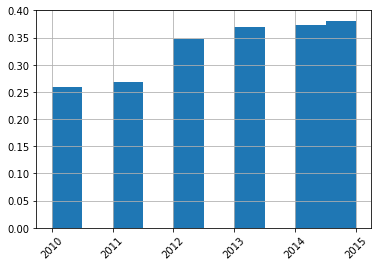

Recidivism - Return to Prison numeric         0         1
Recidivism Reporting Year                                
2013                                   0.696717  0.303283
2014                                   0.703344  0.296656
2015                                   0.681435  0.318565
2016                                   0.657563  0.342437
2017                                   0.646097  0.353903
2018                                   0.621856  0.378144
Recidivism - Return to Prison numeric     0     1
Recidivism Reporting Year                        
2013                                   2589  1127
2014                                   2755  1162
2015                                   3230  1510
2016                                   3082  1605
2017                                   2963  1623
2018                                   2720  1654
Não Reincide


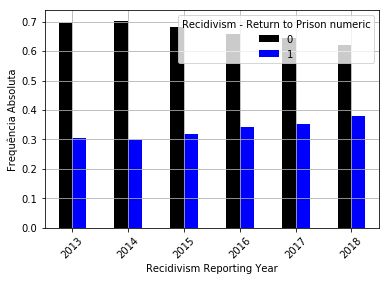

Reincide


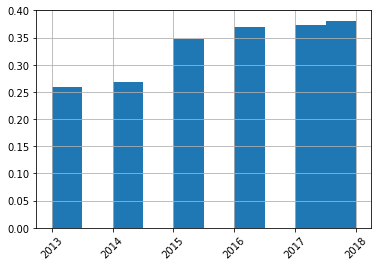

Recidivism - Return to Prison numeric                   0         1
Race - Ethnicity                                                   
American Indian or Alaska Native - Hispanic      0.700000  0.300000
American Indian or Alaska Native - Non-Hispanic  0.603586  0.396414
Asian or Pacific Islander - Hispanic             0.600000  0.400000
Asian or Pacific Islander - Non-Hispanic         0.770833  0.229167
Black -                                          1.000000  0.000000
Black - Hispanic                                 0.702703  0.297297
Black - Non-Hispanic                             0.665739  0.334261
N/A -                                            1.000000  0.000000
White -                                          0.916667  0.083333
White - Hispanic                                 0.785151  0.214849
White - Non-Hispanic                             0.655994  0.344006
Recidivism - Return to Prison numeric                0     1
Race - Ethnicity                                       

KeyboardInterrupt: 

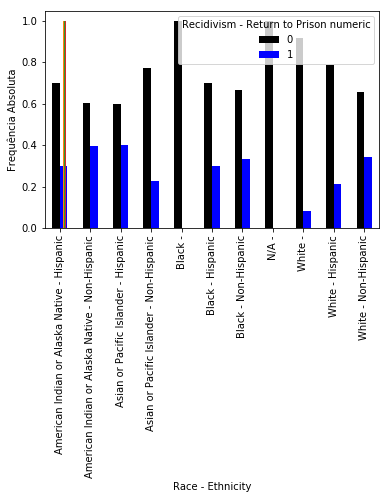

In [11]:
explora=exploratoria(db,'Recidivism - Return to Prison numeric',num=['Fiscal Year Released','Recidivism Reporting Year'],cat=['Fiscal Year Released','Recidivism Reporting Year','Race - Ethnicity','Convicting Offense Classification','Convicting Offense Type','Convicting Offense Subtype','Main Supervising District','Release Type','Release type: Paroled to Detainder united','Part of Target Population'])

#'''"Age At Release" não está funcionando'''

In [ ]:
plt.figure()
explora['hist_0']['Fiscal Year Released']


In [ ]:
encoder = OneHotEncoder()
def one_hot_enc(data,num=[],cat=[]):
    d=data[cat]
    #d.replace(np.nan,'not')
    """
    for c in cat:
        n=0
        while n < len(d[c]):
            if d[c][n]==np.nan:
                d[c][n]='not'
                print (d[c][n])
            n+=1
    """
    dnum=data[num]
    encoded=encoder.fit_transform(d)
    array=encoded.toarray()[0]
    numarray=dnum.toarray
    return np.concatenate((numarray, array), axis=1)

In [ ]:
var_enc = one_hot_enc(db,cat=['Main Supervising District','Fiscal Year Released','Recidivism Reporting Year','Race - Ethnicity','Convicting Offense Classification','Convicting Offense Type','Convicting Offense Subtype','Release Type','Release type: Paroled to Detainder united','Part of Target Population'])




# CONCLUSÃO

# REFERÊNCIAS

**[1]** IPEA. Reincidência criminal no Brasil. Disponível em: https://www.cnj.jus.br/wp-content/uploads/2011/02/716becd8421643340f61dfa8677e1538.pdf. Acesso em 15 nov. 2019.

**[1]** BLABLBALBALBABA

**[1]** BLABLBALBALBABA

**[1]** BLABLBALBALBABA